In [35]:
import pandas as pd
import numpy as np
import math,statistics

import matplotlib.pyplot as plt

import pickle

In [36]:
data= pd.read_csv('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Advertising.csv') # Reading the data file

In [37]:
data.head(2)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [38]:
data.tail(2)

,Unnamed: 0,TV,radio,newspaper,sales
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [39]:
data.shape

(200, 5)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [41]:
for i in data:
    un=data[i].unique()
    print(i,':',un)
    print('\n')

Unnamed: 0 : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]


TV : [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 24

In [42]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

* Data is clean no impurieties.

In [43]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

1. Data is in numerical form
2. Data dont have null value

Now our data is clean so we can proceed further.

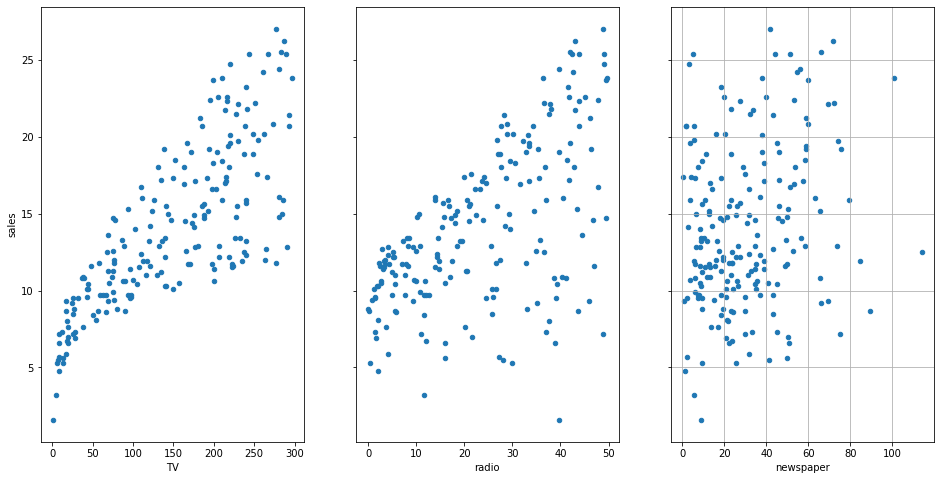

In [44]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
plt.grid(True)

How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:
1. What’s the relationship between ads and sales?
2. How prominent is that relationship?
3. Which ad types contribute to sales?
4. How each ad contributes to sales?
5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!


# 1. What’s the relationship between ads and sales?

by above scatter grpahs we can say linear relation between adds and sale so we can apply Linear Regression model 

## - Linear

In [45]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False)
lm.fit(X, y)

# print intercept and coefficients
print("intercept :",lm.intercept_)
print("Slope/Coeff :",lm.coef_)

intercept : 0.0
Slope/Coeff : [0.08324961]


In [46]:
# create a DataFrame with the minimum and maximum values of TV,Radio, Newspaper
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()],'radio': [data.radio.min(), data.radio.max()],'newspaper': [data.newspaper.min(), data.newspaper.max()]})
X_new.head()

,TV,radio,newspaper
0,0.7,0.0,0.3
1,296.4,49.6,114.0


# simple linear regression model

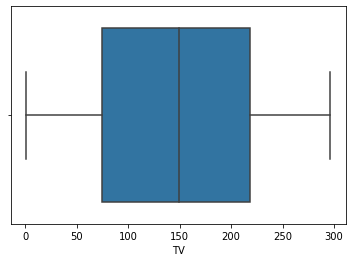

In [47]:
# 3. Which ad types contribute most to sales?
import seaborn as sns
sns.boxplot(x=data['TV'])

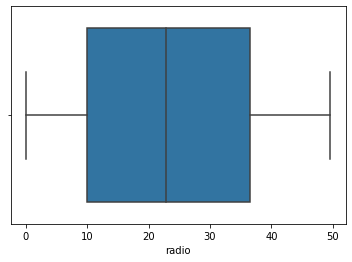

In [48]:
sns.boxplot(x=data['radio'])

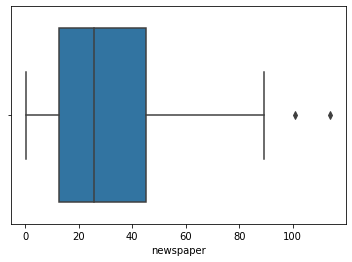

In [49]:
sns.boxplot(x=data['newspaper'])

[ 0.05827473 24.67518402]


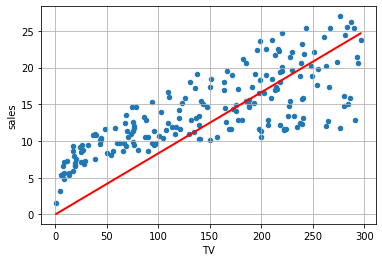

In [50]:
tv_new=pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
preds = lm.predict(tv_new)
print(preds)

data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(tv_new, preds, c='red', linewidth=2)
plt.grid(True)

In [51]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
print('confidence interval:\n',lm.conf_int(),'\n')
# print the p-values for the model coefficients
print('pvalue\n',lm.pvalues,'\n')
# print the R-squared value for the model
print('R squared: \n',lm.rsquared,'\n')

confidence interval:
                   0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843 

pvalue
 Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64 

R squared: 
 0.611875050850071 



# Multiple Linear regression model

### Linear Regression

In [52]:
# Linear Regression
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print("intercept",lm.intercept_)
print('coeff',lm.coef_)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
print('\n')
print('confidence interval:\n',lm.conf_int())
print('\n Summary:\n')
#rint(lm.summary())

intercept 2.9388893694594085
coeff [ 0.04576465  0.18853002 -0.00103749]


confidence interval:
                   0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
radio      0.171547  0.205513
newspaper -0.012616  0.010541

 Summary:



In [53]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        21:46:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [55]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

Selecting highest Rsquared model is not good approach , bcoz by adding new feature in model increases model Rsquared

alternative is to use Adjusted R squared but it may create complexities

Best way of feature selection is cross validation

Still we are with numeric feature now we are adding categorical feature scale

In [56]:
# calculate min, max and mean of sales column 
minsale=data['sales'].min()
maxsale=data['sales'].max()
mean=data['sales'].mean()

data['Scale']='small'  # set all scale values to small
mask_large=data['sales']>mean  # mask is the values having value more that mean_sale
data.loc[mask_large, 'Scale'] = 'large' # for value greater than mean set large scale

In [57]:
print("min:",minsale,',max:',maxsale,',mean:',mean)

min: 1.6 ,max: 27.0 ,mean: 14.022500000000003


In [58]:
data.head(4)

,TV,radio,newspaper,sales,Scale
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,9.3,small
3,151.5,41.3,58.5,18.5,large


In [59]:
data.tail(4)

,TV,radio,newspaper,sales,Scale
196,94.2,4.9,8.1,9.7,small
197,177.0,9.3,6.4,12.8,small
198,283.6,42.0,66.2,25.5,large
199,232.1,8.6,8.7,13.4,small


In [60]:
# create dummy ,a new Series called IsLarge
data['IsLarge'] = data.Scale.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Scale,IsLarge
0,230.1,37.8,69.2,22.1,large,1
1,44.5,39.3,45.1,10.4,small,0
2,17.2,45.9,69.3,9.3,small,0
3,151.5,41.3,58.5,18.5,large,1
4,180.8,10.8,58.4,12.9,small,0


In [61]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'sales']
X = data[feature_cols]
y = data.IsLarge

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)   # fitting the splited model

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i]) # lm.coef_ is ordered list of coefficints
    i=i+1


The Coefficient of  TV  is:  0.001082673742300454
The Coefficient of  radio  is:  0.008145400397879067
The Coefficient of  newspaper  is:  -0.0014954478353878527
The Coefficient of  sales  is:  0.0531411798417492


In [62]:
data= pd.read_csv('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Advertising.csv') # Reading the data file

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error  # ,mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# new subseting
feature_cols = ['TV', 'radio', 'newspaper']
x = data[feature_cols]
y = data.sales

X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=21) # test size is 30%
LR=LinearRegression().fit(X_train,y_train)          # fitting the splited model
         
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)

Y='sales'

In [88]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
# linear graph
#import seaborn as sns
#sns.scatterplot(x=y_test,y=y_test_pred)

print('\033[1m')
print("\n",'\033[95m'," *********Accuracy results of Linear regressor :",Y,"*********",'\033[0m')
print('\033[0m')
#R2 score
r2tr = r2_score(y_train,y_train_pred)
r2te = r2_score(y_test, y_test_pred)
print("R squared: ")
print('   R2: (On train,On test)=',(r2tr,r2te))
# mean absolute error
MAEtr = mean_absolute_error(y_train,y_train_pred)
MAEte = mean_absolute_error(y_test, y_test_pred)
print("\nMean Absolute Error:")
print('   MAE: (On train,On test)=',(MAEtr,MAEte))
# Mean absolute percentage error(MAPE)
MAPEtr=MAPE(y_train,y_train_pred)
MAPEte=MAPE(y_test,y_test_pred)
print("\nMean absolute percentage error:")
print('   MAPE: (On train,On test)=',(MAPEtr,MAPEte))
# mean squared error(MSE)
MSEtr = mean_squared_error(y_train,y_train_pred)
MSEte = mean_squared_error(y_test,y_test_pred) 
print("\nMean squared Error:")
print('   MSE: (On train,On test)=',(MSEtr,MSEte))
# root mean squred error(RMSE)
RMSEtr=math.sqrt(MSEtr)
RMSEte=math.sqrt(MSEte)
print("\nRoot mean squared Error:")
print("   RMSE: (on train, on test)=",(RMSEtr,RMSEte))



   *********Accuracy results of Linear regressor : sales ********* 

R squared: 
   R2: (On train,On test)= (0.9084623128271936, 0.8693216761737506)

Mean Absolute Error:
   MAE: (On train,On test)= (1.1360792317459782, 1.4648630833215708)

Mean absolute percentage error:
   MAPE: (On train,On test)= (10.662903359108817, 22.546258807723454)

Mean squared Error:
   MSE: (On train,On test)= (2.261906337866797, 4.263602104986547)

Root mean squared Error:
   RMSE: (on train, on test)= (1.5039635427319364, 2.0648491724546245)


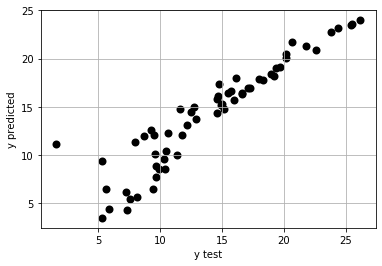

In [90]:
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.scatter(y_test,y_test_pred, c='black', linewidth=2)
plt.grid(True)

In [84]:
#X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})

# then, plot the least squares line
#plt.plot(y_Test_New,y_test_pred, c='black', linewidth=2)

y_Test_New=pd.DataFrame({'New':[y_test.min(),y_test.max()]})
y_Test_New

,New
0,1.6
1,26.2


# Ridge regression